  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>DIABETES  PREDICTION 
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:

Diabetes is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medicine, as it is one of the leading diseases related to an unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or aversion.


In this study, we experiment with the diabetes dataset to explore the machine learning algorithms and build an optimum model to predict the disease.


## **Data Definition:**

**Input variables:**

1) **id:** Patient id


2) **Phone_no:** Phone number of the patient


3) **District:** Name of the district


4) **Gender:** Gender of the patient (0 - male, 1 - female)


5) **Cholesterol:** Cholesterol level of the patient


6) **Glucose:** Glucose level in patient blood 


7) **Blood Pressure:** Blood pressure level of the patient 


8) **Skin Thickness:** Thickness of the patient skin 


9) **Insulin:** Insulin level in patient blood 


10) **BMI:** Body Mass Index of the patient 


11) **DiabetesPedigreeFunction:** Indicates the function which scores likelihood of diabetes based on family history 


12) **Age:** Age of the patient


13) **Blurry vision:** Does a patient has blurry vision (0 - no, 1 - yes)


14) **Weight loss:** Does a patient under go weight loss(0 - no, 1 - yes)


15) **Numbness:** Does a patient feel numbness in hands/feets (0 - no, 1 - yes) 


16) **Urinating often:** Does a patient urinating often even when drinking less water (0 - no, 1 - yes)


17) **Thirsty:** Does a patient fell thirsty even after drinking water (0 - no, 1 - yes)


18) **Outcome:** Does a patient has diabetes or not (0 - no, 1 - yes) - (Target variable)


**Contents**

1. **[Import Packages](#import_packages)**

2. **[Read Data](#Read_Data)**

3. **[Data Analysis and Preparation](#data_preparation)**
    - 3.1 - **[Understand the Dataset](#Data_Understanding)**
        - 3.1.1 - **[Data Type](#Data_Types)**
        - 3.1.2 - **[Summary Statistics](#Summary_Statistics)**
        - 3.1.3 - **[Distribution of Variables](#distribution_variables)**
        - 3.1.4 - **[Correlation](#correlation)**
        - 3.1.5 - **[Discover Outliers](#outliers)**
        - 3.1.6 - **[Missing Values](#Missing_Values)**
        - 3.1.7 - **[Duplicate Values](#Duplicate_Values)**
        - 3.1.8 - **[Dummies](#Dummies)**     
    - 3.2 - **[Visualization](#Visualization)**
    - 3.3 - **[Balancing of Data](#feature_selection)**
    
4. **[Feature Selection](#feature_selection)**
    - 4.1 - **[Logistic Regression](#Logistic_Regression)**
    - 4.2 - **[Decision Tree Classifier](#Decision_Tree_Classifier)**
    - 4.3 - **[Random Forest Classifier](#Random_Forest_Classifier)** 
    
5. **[Ensemble Techniques](#Ensemble_Techniques)**
    - 5.1 - **[Bagging meta-estimator](#meta_estimator)**
    - 5.2 - **[AdaBoost](#AdaBoost)**
    - 5.3 - **[XGBM](#XGBM)**
    
6. **[Model Comparision](#model_cmp)** 

7. **[Power BI Report](#power_bi)**
  

<a id='import_packages'></a>
## **1. Import Packages**

In [5]:
!pip install imblearn

  Using cached scikit_learn-1.1.1-cp39-cp39-win_amd64.whl (7.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [105]:
!pip install mysql

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy


<a id='Read_Data'></a>
## **2. Read the Data**

Read the data using read_csv() function from pandas

In [110]:
!pip install mysql-connector-python

In [112]:
import mysql.connector as mysql

In [113]:
db=mysql.connect(host="localhost",user="root",password="flames24",database="diabetes", auth_plugin='mysql_native_password')

In [114]:
print(db)

In [115]:
myc=db.cursor()
myc=db.cursor(buffered=True, dictionary=True)

In [116]:
myc.execute('SELECT * FROM diabetes.`diabetes(800) dataset`')

In [117]:
raw_data=pd.DataFrame(myc.fetchall())

In [119]:

# read the data
#raw_data = pd.read_csv('Diabetes(800) Dataset.csv')

# print the first five rows of the data
raw_data.head()

,id,Phone_no,District,Gender,Cholesterol,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Blurry vision,Weight loss,Numbness,Urinating often,Thirsty,Outcome
0,434264,6851562255,Krishnagiri,female,183,148,72,35,0,33.6,0.627,50,no,yes,yes,yes,yes,yes
1,474514,7364308316,Tirupathur,male,273,85,66,29,0,26.6,0.351,31,yes,no,no,no,no,no
2,667797,6020652254,Karur,female,138,183,64,0,0,23.3,0.672,32,yes,no,yes,yes,yes,yes
3,449140,9508699215,Ramanathapuram,female,289,89,66,23,94,28.1,0.167,21,no,yes,,no,no,no
4,707888,9804139936,Sivaganga,male,322,137,40,35,168,43.1,2.288,33,no,yes,yes,yes,yes,yes


In [120]:
# shape of the data frame 

raw_data.shape

(800, 18)

<a id='data_preparation'></a>
## **3. Data Analysis and Preparation**

Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study correlation<br>
                        6. Detect outliers<br>
                        7. Check for missing values<br><br>
                        Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area
                    

<a id='Data_Understanding'></a>
## **3.1 Understand the Dataset**

<a id='Data_Types'></a>
## **3.1.1 Data Type**

The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.<br><br> 
                        1. Check for the data type <br>
                        2. For any incorrect data type, change the data type with the appropriate type<br>
                        3. Recheck for the data type
                   

**1. Check for the data type**

In [121]:
# 'dtypes' gives the data type for each column
raw_data.dtypes

id                            int64
Phone_no                      int64
District                     object
Gender                       object
Cholesterol                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Blurry vision                object
Weight loss                  object
Numbness                     object
Urinating often              object
Thirsty                      object
Outcome                      object
dtype: object

From the above output, it is clear to see that the data type of variables 'Blurry vision', 'Weight loss', 'Numbness', 'Urinating often' and 'Thirsty',and 'District' are categorical variables, 'BMI' is a float64 and the remaining are all int64.
                

For convenience, we shall split the target variable from the data frame.
Let dataframe 'df_target' be the dataframe containing the dependent variable, dataframe 'df_features' be the set of all independent variables and dataframe 'district' be the dataframe containing the categorical data.

In [122]:
# splitting features, the target and the categorical variable
# consider all the columns except 'target' using 'iloc'
# here id is not required for analysis

district=raw_data.District

df_features = raw_data.iloc[:, raw_data.columns != 'Outcome']
df_features=df_features.drop(['id','Phone_no','District'],axis=1)
raw_data=raw_data.drop(['id','Phone_no','District'],axis=1)
# consider the target variable
df_target = raw_data.iloc[:,raw_data.columns == 'Outcome']

Use the dataframe containing features (df_features) for further analysis.

<a id='Summary_Statistics'></a>
## **3.1.2 Summary Statistics**

**Use the describe()**

In [123]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
#We transpose the results for better readability


df_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cholesterol,800.0,226.195000,72.691795,100.000,164.00000,230.0000,292.00000,350.00
Glucose,800.0,119.312500,34.444163,0.000,99.00000,116.0000,141.00000,199.00
BloodPressure,800.0,68.932500,20.355119,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,800.0,21.655000,17.609190,0.000,0.00000,23.0000,33.00000,99.00
Insulin,800.0,95.705000,144.744133,0.000,0.00000,44.5000,140.00000,846.00
BMI,800.0,32.051625,7.918932,0.000,27.40000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,800.0,0.474614,0.335750,0.078,0.24475,0.3745,0.62025,2.42
Age,800.0,34.016250,12.726387,21.000,24.00000,29.0000,41.00000,81.00


The above output illustrates the summary statistics of all the numeric variables namely mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.<br>
For example, the average age of a person considered in the study is 34 years, where the minimum age is 21 years and the maximum age is 81 years.<br><br>
It can be seen that some variables have observations less than 800 which is not equal to the total number of observations. This suggests that there are some missing values.

<a id='distribution_variables'></a>
## **3.1.3 Distribution of Variables**

Check the distribution of all the variables <br><br>
                        1. Distribution of numeric independent variables<br>
                        2. Distribution of categoric independent variables<br>
                        3. Distribution of dependent variable
                   

#### 1. Distribution of numeric independent variables.

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

In [124]:
df_features.columns

Index(['Gender', 'Cholesterol', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Blurry vision',
       'Weight loss', 'Numbness', 'Urinating often', 'Thirsty'],
      dtype='object')

Cholesterol


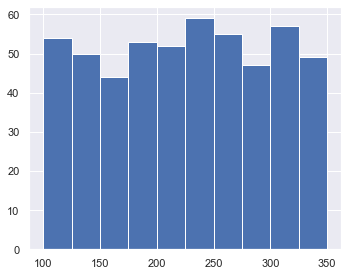

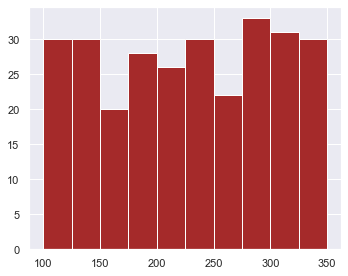

Glucose


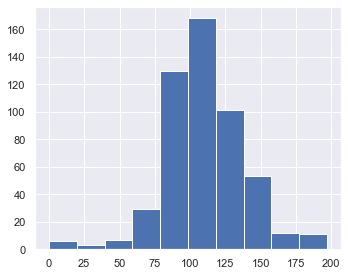

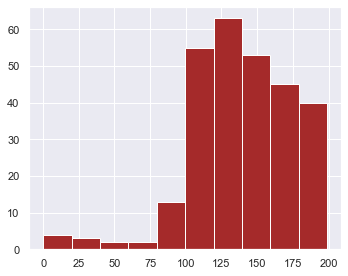

BloodPressure


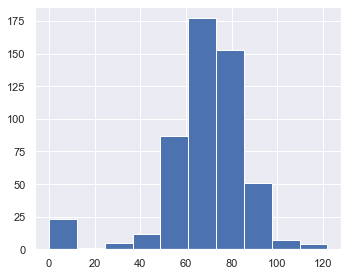

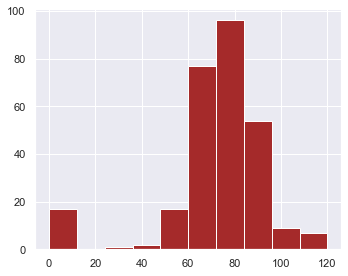

SkinThickness


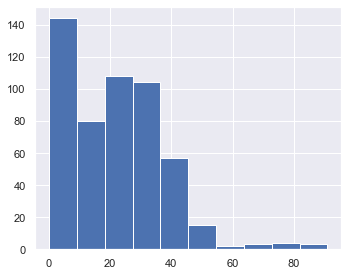

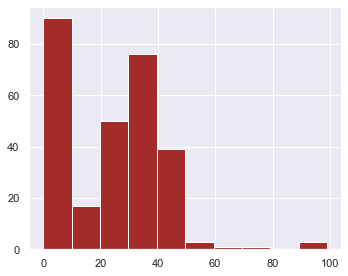

Insulin


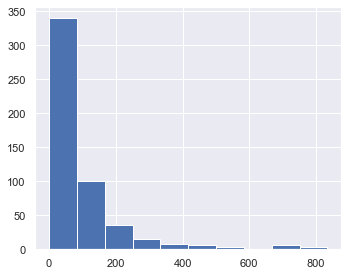

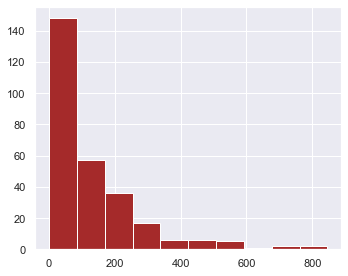

BMI


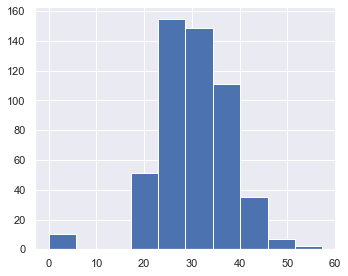

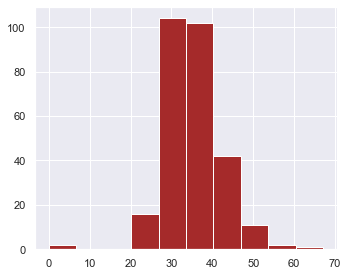

DiabetesPedigreeFunction


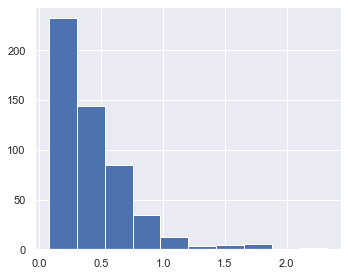

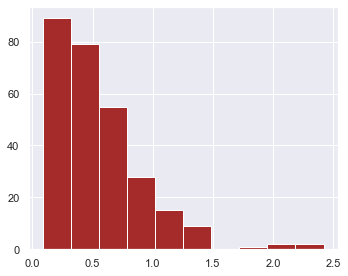

Age


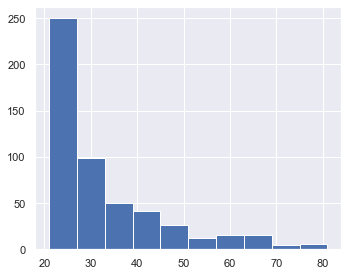

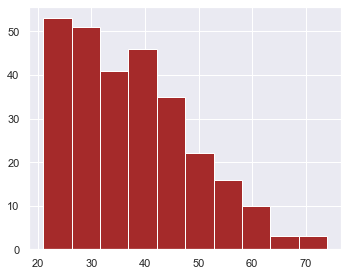

In [125]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default

col=['Cholesterol','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
l1=[]
l2=[]
for i in col:
  for j in range(0,800):
    if df_target.Outcome[j]=='no':
      l1.append(df_features[i][j])
    else:
      l2.append(df_features[i][j])
  plt.figure(figsize=(5,4))
  print(i)
  plt.hist(l1)
  plt.tight_layout()
  plt.show()
  plt.figure(figsize=(5,4))
  plt.hist(l2,color='Brown')
  plt.tight_layout()
  plt.show()  
  l1=[]
  l2=[]
 


It can be seen that the variable 'Age', 'DiabetesPedigreeFunction', and 'Insulin' is right-skewed and variables 'Glucose' and 'SkinThickness' have slight right skew, but not a very long right tail. <br> <br> 
                        The variables which is near normally distributed are 'BloodPressure' and 'BMI'.<br><br>  


#### 2. Distribution of categoric independent variables.

For the independent categoric variables, we plot the bar plot to check the distribution of each variables.

Categorical datas : ['Gender', 'Blurry vision', 'Weight loss', 'Numbness', 'Urinating often', 'Thirsty']
Gender


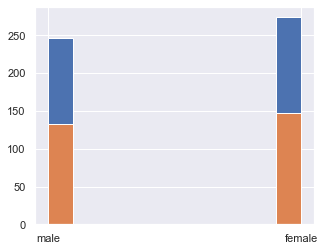

Blurry vision


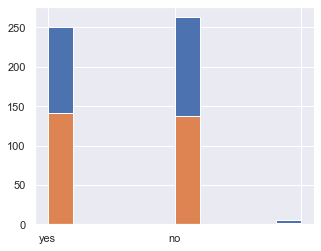

Weight loss


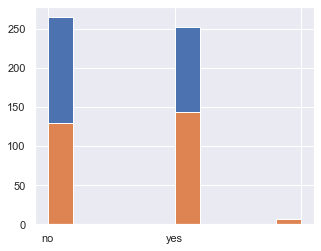

Numbness


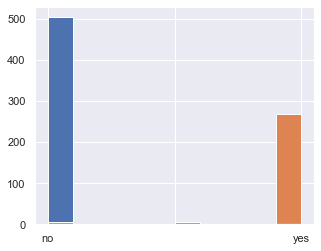

Urinating often


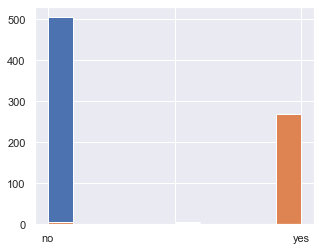

Thirsty


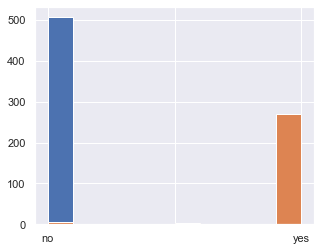

In [126]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_features:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_features[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)
print("Categorical datas :",categorical)

col=categorical
l1=[]
l2=[]
for i in col:
  for j in range(0,800):
    if df_target.Outcome[j]=='no':
      l1.append(df_features[i][j])
    else:
      l2.append(df_features[i][j])
  #l1.hist()
  #l2.hist()
  plt.figure(figsize=(5,4))
  print(i)
  plt.hist(l1)
  plt.hist(l2)
  plt.show()
  l1=[]
  l2=[]
  

Here there is no categorical data in df_features.

#### 3. Distribution of dependent variable.

In section 3.1.1, we have split the dependent variable (target) and created a dataframe 'df_target'. Use this dataframe to check the distribution of target.

In [127]:
# get counts of 0's and 1's in the 'target' variable using 'value_counts()'
# store the values in 'class_frequency'
class_frequency = df_target.Outcome.value_counts()
class_frequency

no     520
yes    280
Name: Outcome, dtype: int64

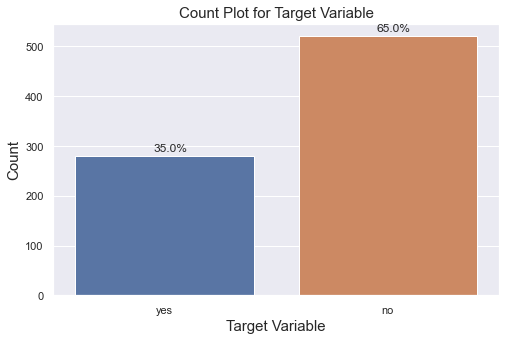

In [128]:
# plot the countplot of the variable 'target'
sns.countplot(x = df_target.Outcome)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = 0.95, y = df_target.Outcome.value_counts()[0] + 10, s = str((class_frequency[0])*100/len(df_target.Outcome)) + '%')
plt.text(x = -0.05, y = df_target.Outcome.value_counts()[1] +10, s = str((class_frequency[1])*100/len(df_target.Outcome)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

There are a total of 520 patients who do not have the disease, and 280 patients are affected by the Diabetes.

<a id='correlation'></a>
## **3.1.4 Correlation**

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near  1  indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

To check the correlation between numerical variables, we perform the following steps:<br><br>
                    1. Compute a correlation matrix  <br>
                    2. Plot a heatmap for the correlation matrix
                    

**1. Compute a correlation matrix**

In [129]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df_features.corr()

# print the correlation matrix
corr

,Cholesterol,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Cholesterol,1.000000,-0.049227,-0.071530,0.005066,0.002727,-0.025328,0.034572,-0.009870
Glucose,-0.049227,1.000000,0.121299,-0.023698,0.109591,0.188953,0.110586,0.201821
BloodPressure,-0.071530,0.121299,1.000000,0.152998,0.041391,0.266524,0.052943,0.160794
SkinThickness,0.005066,-0.023698,0.152998,1.000000,0.480079,0.350691,0.205056,-0.009201
Insulin,0.002727,0.109591,0.041391,0.480079,1.000000,0.182451,0.132335,0.091236
BMI,-0.025328,0.188953,0.266524,0.350691,0.182451,1.000000,0.123226,0.025489
DiabetesPedigreeFunction,0.034572,0.110586,0.052943,0.205056,0.132335,0.123226,1.000000,0.043734
Age,-0.009870,0.201821,0.160794,-0.009201,0.091236,0.025489,0.043734,1.000000


**2. Plot the heatmap for the diagonal correlation matrix**

A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.

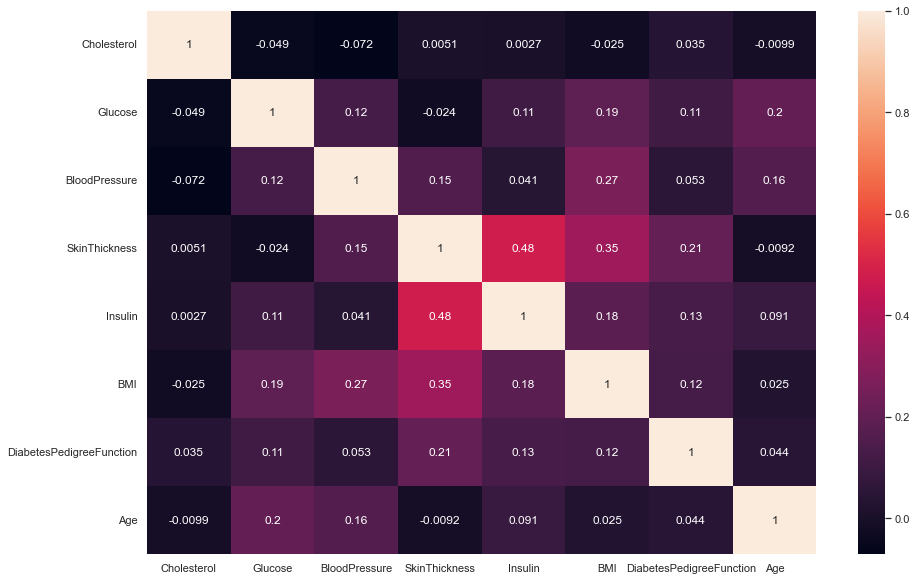

In [130]:
# Heat Map

plt.figure(figsize=(15,10))
sns.heatmap(raw_data.corr(), annot=True);

From the above heatmap, it can seen that the continuous variables are not highly correlated with each other since all the correlation coefficients are less than close to 0.5. The maximum positive correlation is 0.48 between 'Insulin' and 'SkinThickness'. <br><br>
Note: The diagonal values are always 1 because it is the correlation of the variable with itself.

Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.

<a id='outliers'></a>
## **3.1.5 Discover Outliers**

Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

To detect outliers in numeric data, we plot the boxplot for the data

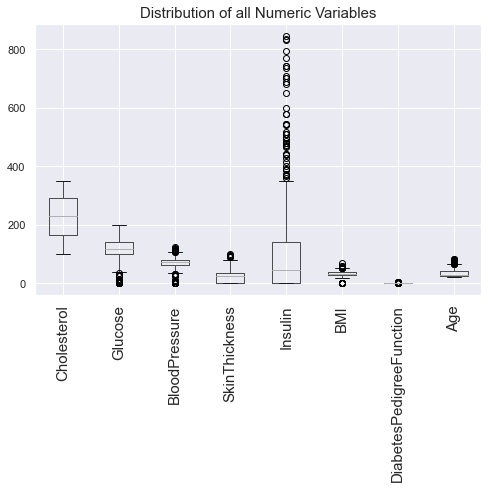

In [131]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

<a id='Missing_Values'></a>
## **3.1.6 Missing Values**

First, run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them.

In [132]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = raw_data.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (raw_data.isnull().sum()*100/raw_data.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Gender,0,0.0
Cholesterol,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Blurry vision,0,0.0


Some of the variables contain the missing values.

How to deal with missing data?<br><br>


Replace data<br>

a. Replace it by mean<br>

b. Replace it by frequency<br>
c. Replace it based on other functions<br><br>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing the method to replace the data.

In [133]:
# checking for missing values

raw_data.isna().sum().sort_values(ascending=False)

Gender                      0
Cholesterol                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Blurry vision               0
Weight loss                 0
Numbness                    0
Urinating often             0
Thirsty                     0
Outcome                     0
dtype: int64

In [134]:
n=raw_data.shape[0]

In [135]:

for i in range(0,n):
  if (pd.isna(raw_data['Weight loss'][i])):
    
    if raw_data['Outcome'][i]=='yes':
      raw_data['Weight loss'][i]='yes'
    
    else:
      raw_data['Weight loss'][i]='no'

In [136]:
#Filling the missing values
for i in range(0,n):
  if (pd.isna(raw_data['Numbness'][i])):
    
    if raw_data['Outcome'][i]=='yes':
      raw_data['Numbness'][i]='yes'
    
    else:
      raw_data['Numbness'][i]='no'

In [137]:
#Filling the missing values

for i in range(0,n):
  if (pd.isna(raw_data['Blurry vision'][i])):
    
    if raw_data['Outcome'][i]=='yes':
      raw_data['Blurry vision'][i]='yes'
    
    else:
      raw_data['Blurry vision'][i]='no'

In [138]:
#Filling the missing values

for i in range(0,n):
  if (pd.isna(raw_data['Urinating often'][i])):
    
    if raw_data['Outcome'][i]=='yes':
      raw_data['Urinating often'][i]='yes'
    
    else:
      raw_data['Urinating often'][i]='no'

In [139]:
#Filling the missing values

for i in range(0,n):
  if (pd.isna(raw_data['Thirsty'][i])):
    
    if raw_data['Outcome'][i]=='yes':
      raw_data['Thirsty'][i]='yes'
    
    else:
      raw_data['Thirsty'][i]='no'

In [140]:
# checking for missing values again

raw_data.isna().sum().sort_values(ascending=False)

Gender                      0
Cholesterol                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Blurry vision               0
Weight loss                 0
Numbness                    0
Urinating often             0
Thirsty                     0
Outcome                     0
dtype: int64

<a id='Duplicate Values'></a>
## **3.1.7 Duplicate Values**

In [141]:
raw_data.shape

(800, 15)

In [142]:
raw_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Length: 800, dtype: bool

In [143]:
raw_data=raw_data.drop_duplicates()

In [144]:
raw_data.shape

(800, 15)

<a id='Dummies'></a>
## **3.1.8 Dummies**

In [145]:
df_features

,Gender,Cholesterol,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Blurry vision,Weight loss,Numbness,Urinating often,Thirsty
0,female,183,148,72,35,0,33.6,0.627,50,no,yes,yes,yes,yes
1,male,273,85,66,29,0,26.6,0.351,31,yes,no,no,no,no
2,female,138,183,64,0,0,23.3,0.672,32,yes,no,yes,yes,yes
3,female,289,89,66,23,94,28.1,0.167,21,no,yes,,no,no
4,male,322,137,40,35,168,43.1,2.288,33,no,yes,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,male,234,33,87,18,796,39.2,0.528,33,yes,no,no,no,yes
796,male,315,109,41,74,834,25.2,0.299,37,yes,yes,yes,yes,yes
797,female,285,62,106,73,122,37.2,0.509,68,no,no,yes,no,no
798,female,278,9,99,23,278,48.3,0.238,29,yes,no,no,no,yes


In [146]:
df_features=pd.get_dummies(df_features)

In [147]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cholesterol               800 non-null    int64  
 1   Glucose                   800 non-null    int64  
 2   BloodPressure             800 non-null    int64  
 3   SkinThickness             800 non-null    int64  
 4   Insulin                   800 non-null    int64  
 5   BMI                       800 non-null    float64
 6   DiabetesPedigreeFunction  800 non-null    float64
 7   Age                       800 non-null    int64  
 8   Gender_female             800 non-null    uint8  
 9   Gender_male               800 non-null    uint8  
 10  Blurry vision_            800 non-null    uint8  
 11  Blurry vision_no          800 non-null    uint8  
 12  Blurry vision_yes         800 non-null    uint8  
 13  Weight loss_              800 non-null    uint8  
 14  Weight los

In [148]:
df_features = raw_data.iloc[:, raw_data.columns != 'Outcome']

In [149]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    800 non-null    object 
 1   Cholesterol               800 non-null    int64  
 2   Glucose                   800 non-null    int64  
 3   BloodPressure             800 non-null    int64  
 4   SkinThickness             800 non-null    int64  
 5   Insulin                   800 non-null    int64  
 6   BMI                       800 non-null    float64
 7   DiabetesPedigreeFunction  800 non-null    float64
 8   Age                       800 non-null    int64  
 9   Blurry vision             800 non-null    object 
 10  Weight loss               800 non-null    object 
 11  Numbness                  800 non-null    object 
 12  Urinating often           800 non-null    object 
 13  Thirsty                   800 non-null    object 
dtypes: float64

<a id='Visualization'></a>
## **3.2 Visualization**

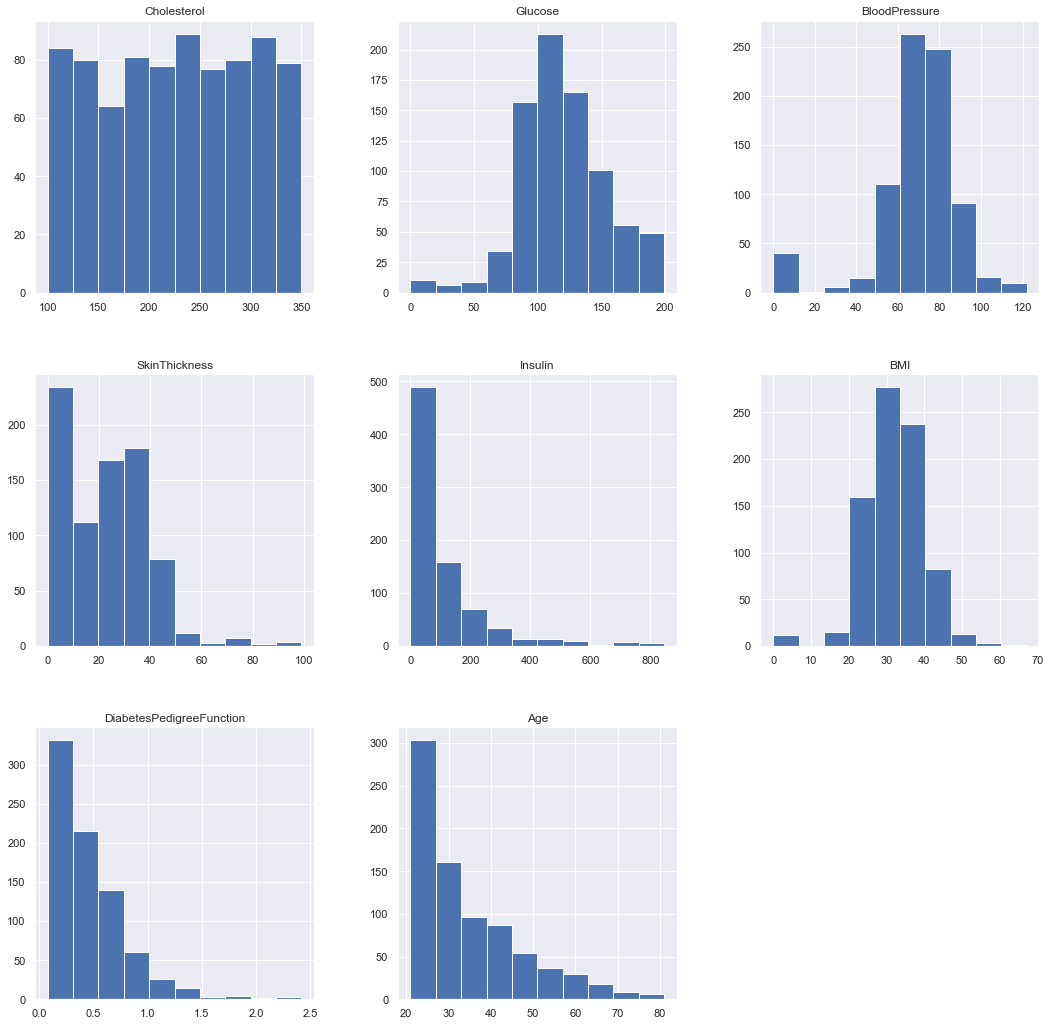

Gender


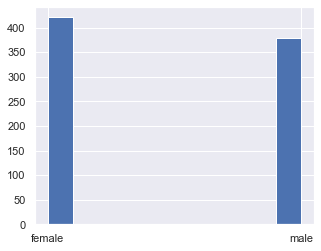

Blurry vision


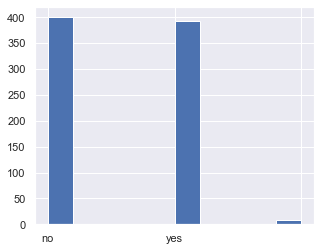

Weight loss


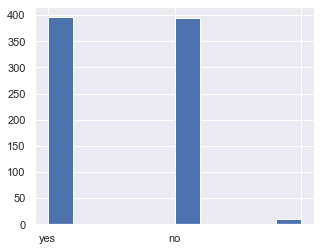

Numbness


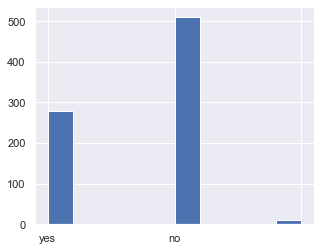

Urinating often


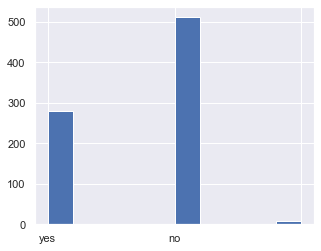

Thirsty


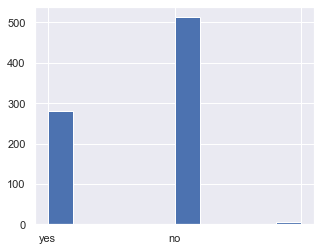

In [150]:
# Histogram

fig = df_features.hist(figsize = (18,18))
col=categorical
plt.show()
for i in col:
  plt.figure(figsize=(5,4))
  print(i)
  plt.hist(df_features[i])
  plt.show()



Gender


<Figure size 3600x360 with 0 Axes>

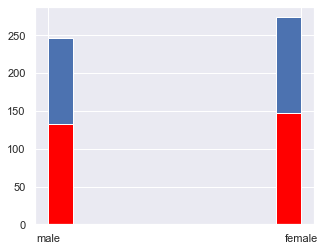

Cholesterol


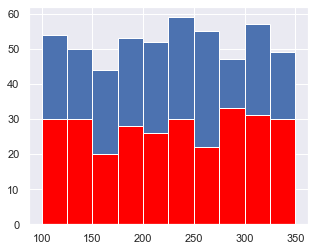

Glucose


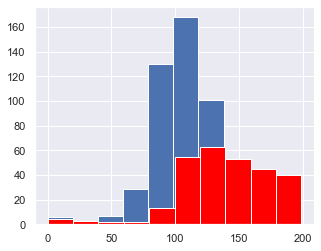

BloodPressure


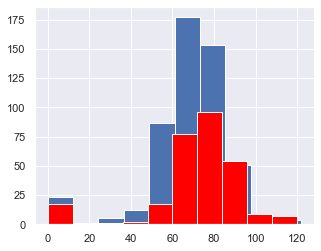

SkinThickness


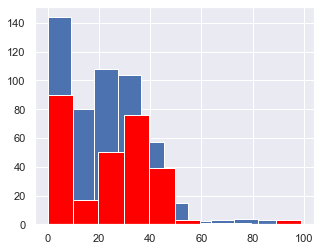

Insulin


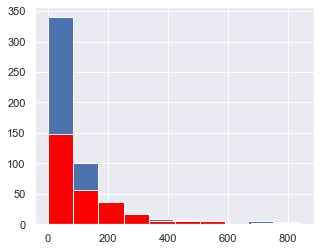

BMI


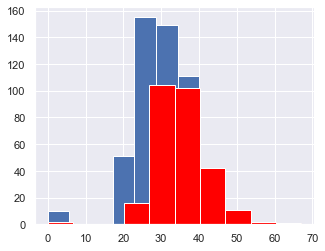

DiabetesPedigreeFunction


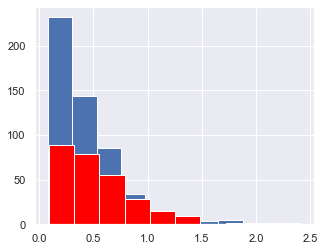

Age


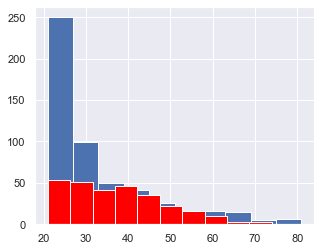

Blurry vision


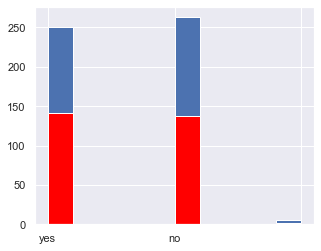

Weight loss


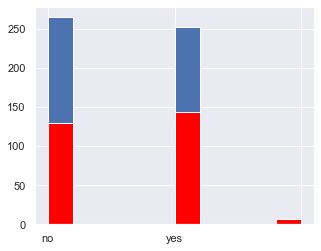

Numbness


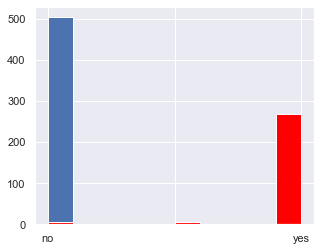

Urinating often


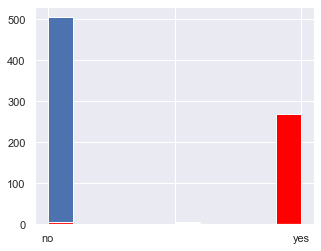

Thirsty


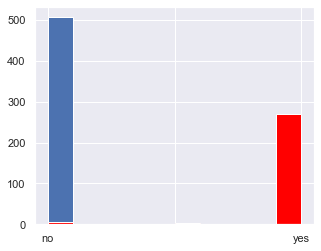

In [151]:
# Histogram
fig = plt.figure(figsize = (50, 5))

col=df_features.columns
l1=[]
l2=[]
for i in col:
  for j in range(0,800):
    if df_target.Outcome[j]=='no':
      l1.append(df_features[i][j])
    else:
      l2.append(df_features[i][j])
  plt.figure(figsize=(5,4))
  print(i)
  plt.hist(l1)
  plt.hist(l2,color='Red')
  plt.show()
  l1=[]
  l2=[]

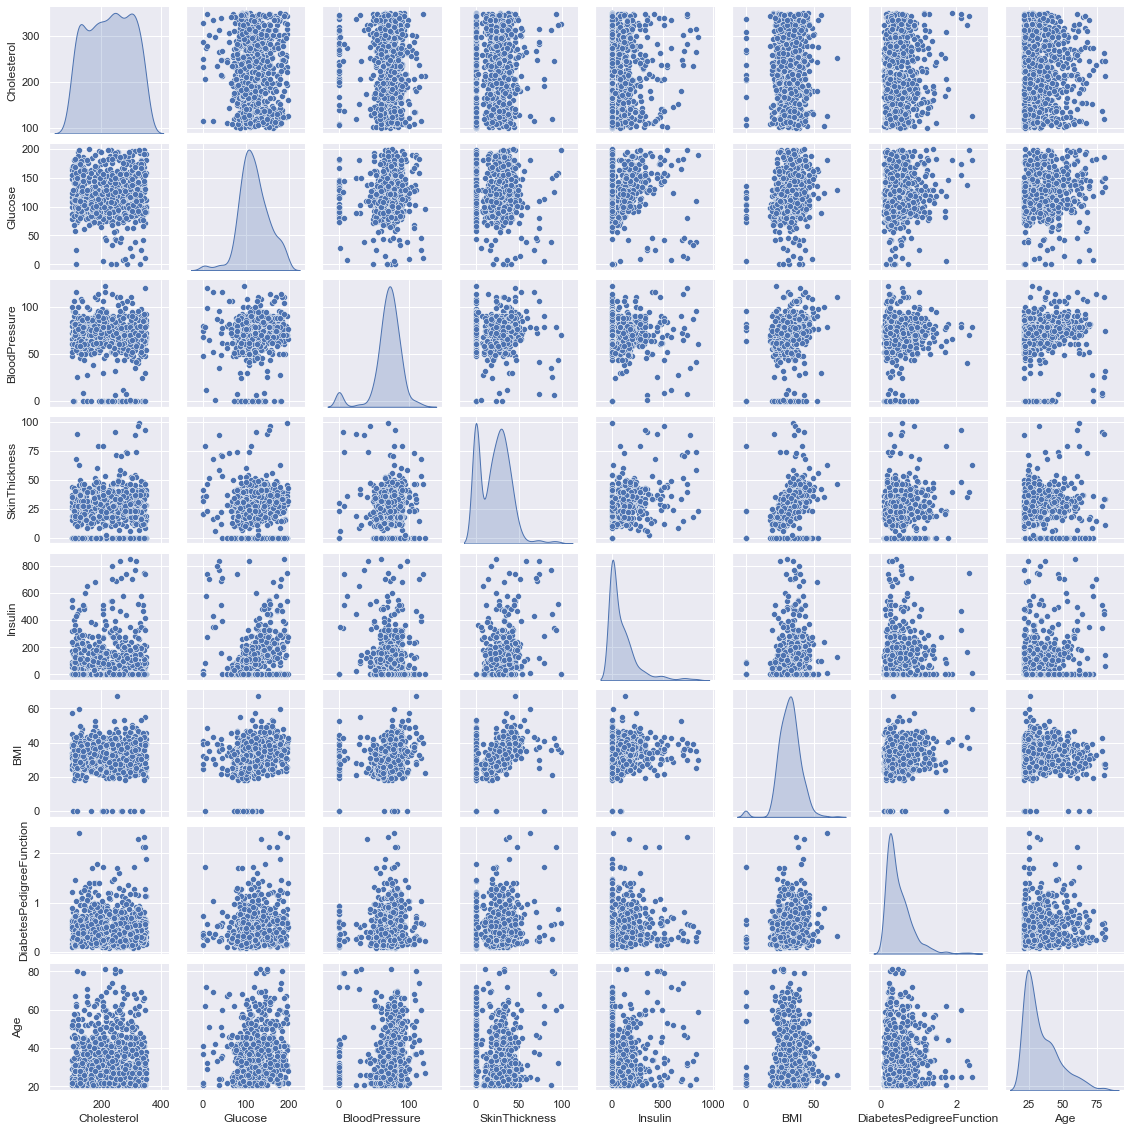

In [152]:
col=['Cholesterol','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']


sns.pairplot(df_features[col],size=2,kind='scatter',diag_kind='kde')
plt.show()

<a id="Balancing of Data"> </a>
## **3.3 Balancing of Data**

In [153]:
raw_data.columns

Index(['Gender', 'Cholesterol', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Blurry vision',
       'Weight loss', 'Numbness', 'Urinating often', 'Thirsty', 'Outcome'],
      dtype='object')

In [154]:
# splitting features and the target variable
# consider all the columns except 'target' using 'iloc'
# here id is not required for analysis
df_features = raw_data.iloc[:, raw_data.columns != 'Outcome']

# consider the target variable
df_target = raw_data.iloc[:,raw_data.columns == 'Outcome']

In [155]:
# get counts of 0's and 1's in the 'target' variable using 'value_counts()'
# store the values in 'class_frequency'
class_frequency = df_target.Outcome.value_counts()
class_frequency

no     520
yes    280
Name: Outcome, dtype: int64

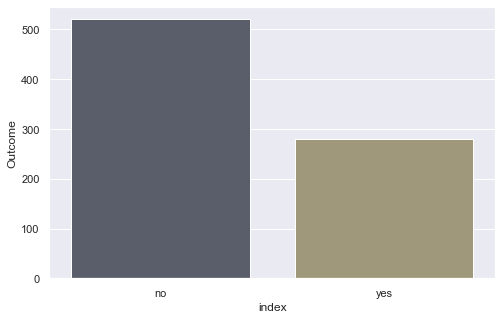

In [156]:
xx = df_target['Outcome'].value_counts().reset_index()
sns.barplot(x = "index", y = "Outcome", data=xx, palette = "cividis");

In [157]:
raw_data['Outcome']=raw_data['Outcome'].replace("yes",1)
raw_data['Outcome']=raw_data['Outcome'].replace("no",0)

df_features=pd.get_dummies(df_features)

SMOTE (Synthetic Minority Oversampling Technique) for balancing data

In [158]:
col_names = list(df_features.columns)


X = df_features[col_names]
y = raw_data['Outcome']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


raw_data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
raw_data.columns = col_names + ['Outcome']
raw_data


,Cholesterol,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Gender_female,Gender_male,...,Numbness_,Numbness_no,Numbness_yes,Urinating often_,Urinating often_no,Urinating often_yes,Thirsty_,Thirsty_no,Thirsty_yes,Outcome
0,183,148,72,35,0,33.600000,0.627000,50,1,0,...,0,0,1,0,0,1,0,0,1,1
1,273,85,66,29,0,26.600000,0.351000,31,0,1,...,0,1,0,0,1,0,0,1,0,0
2,138,183,64,0,0,23.300000,0.672000,32,1,0,...,0,0,1,0,0,1,0,0,1,1
3,289,89,66,23,94,28.100000,0.167000,21,1,0,...,1,0,0,0,1,0,0,1,0,0
4,322,137,40,35,168,43.100000,2.288000,33,0,1,...,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,252,180,0,0,0,40.398739,0.268370,40,1,0,...,0,0,1,0,0,1,0,0,1,1
1036,137,148,76,6,0,37.883147,0.297305,43,1,0,...,0,0,1,0,0,1,0,0,0,1
1037,173,108,62,40,128,36.060695,0.503599,24,0,0,...,0,0,1,0,0,1,0,0,1,1
1038,191,142,59,31,133,34.437024,0.424321,24,0,0,...,0,0,1,0,0,1,0,0,1,1


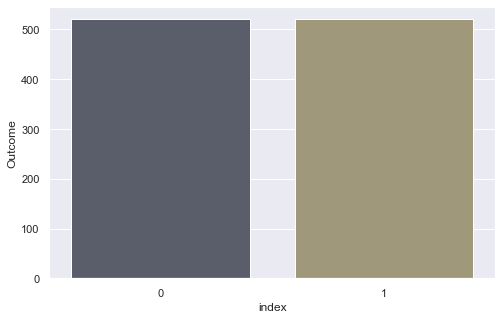

In [159]:
xx = raw_data['Outcome'].value_counts().reset_index()
sns.barplot(x = "index", y = "Outcome", data=xx, palette = "cividis");

<a id="feature_selection"> </a>
## **4. Feature Selection**

## **4.1. Logistic Regression**

In [160]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


In [161]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [162]:
#fitting random forest classification to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [163]:
# predict the values
y_pred = classifier.predict(X_test)

In [164]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       154
           1       0.97      0.99      0.98       158

    accuracy                           0.98       312
   macro avg       0.98      0.98      0.98       312
weighted avg       0.98      0.98      0.98       312



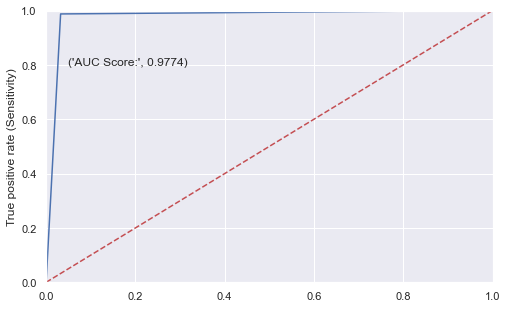

In [165]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes

plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [166]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Logistic_Regression = pd.Series({'Model': "Logistic Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_Regression , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.977437,0.968944,0.987342,0.977564,0.978056


In [167]:
a1=metrics.accuracy_score(y_test, y_pred)

## **4.2. Decision Tree Classifier**

In [168]:
#fitting random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [169]:
# predict the values
y_pred = classifier.predict(X_test)

In [170]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       154
           1       0.97      0.97      0.97       158

    accuracy                           0.97       312
   macro avg       0.97      0.97      0.97       312
weighted avg       0.97      0.97      0.97       312



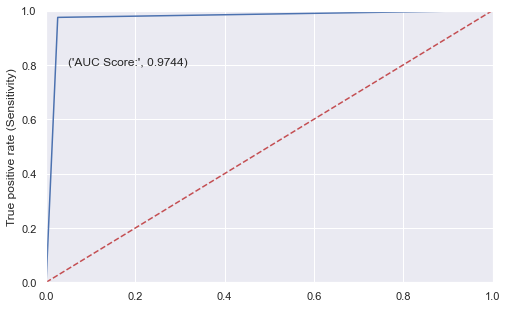

In [171]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes

plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [172]:
from sklearn import metrics
# compiling the required information
Decision_Tree_Classifier = pd.Series({'Model': "Decision Tree Classifier",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_Classifier , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.977437,0.968944,0.987342,0.977564,0.978056
1,Decision Tree Classifier,0.974355,0.974684,0.974684,0.974359,0.974684


In [173]:
a2=metrics.accuracy_score(y_test, y_pred)

## **4.3. Random Forest Classifier**

In [174]:
#fitting random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [175]:
# predict the values
y_pred = classifier.predict(X_test)

In [176]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       154
           1       0.97      0.99      0.98       158

    accuracy                           0.98       312
   macro avg       0.98      0.98      0.98       312
weighted avg       0.98      0.98      0.98       312



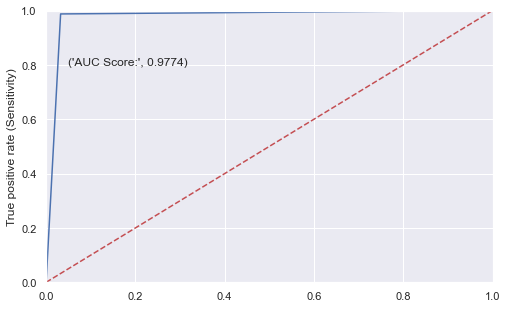

In [177]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes

plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [178]:

# compiling the required information
Random_Forest_Classifier = pd.Series({'Model': "Random Forest Classifier",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Random_Forest_Classifier , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.977437,0.968944,0.987342,0.977564,0.978056
1,Decision Tree Classifier,0.974355,0.974684,0.974684,0.974359,0.974684
2,Random Forest Classifier,0.977437,0.968944,0.987342,0.977564,0.978056


In [179]:
a3=metrics.accuracy_score(y_test, y_pred)

<a id="Ensemble_learning"> </a>
## **5. Ensemble Techniques**

<a id="meta_estimator"> </a>
## **5.1 Bagging meta-estimator**

Now we build a ensemble model using Bagging meta-estimator. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a  ensemble model using Bagging meta-estimator, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      

In [180]:
l=[a1,a2,a3]
ls=['(LR)','(DT)','(RF)']

**1. Build the model**

In [181]:
from sklearn.ensemble import BaggingClassifier


# build the model
if max(l)==a1:
  model = BaggingClassifier(LogisticRegression(random_state=10))
  i=0
elif max(l)==a2:
  model = BaggingClassifier(DecisionTreeClassifier(random_state=10))
  i=1
elif max(l)==a3:
  model = BaggingClassifier(RandomForestClassifier(random_state=10))
  i=2


#meta_estimator = BaggingClassifier(RandomForestClassifier(random_state=10))

# fit the model
model.fit(X_train, y_train)


BaggingClassifier(base_estimator=LogisticRegression(random_state=10))

**2. Predict the values**

In [182]:
# predict the values
y_pred = model.predict(X_test)

**3. Compute accuracy measures**

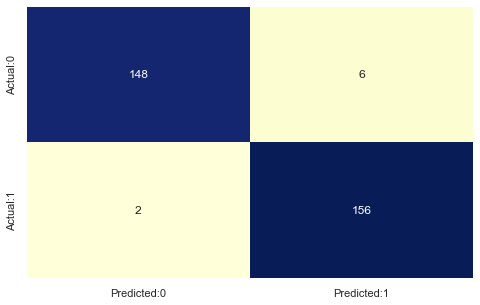

In [183]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [184]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       154
           1       0.96      0.99      0.97       158

    accuracy                           0.97       312
   macro avg       0.97      0.97      0.97       312
weighted avg       0.97      0.97      0.97       312



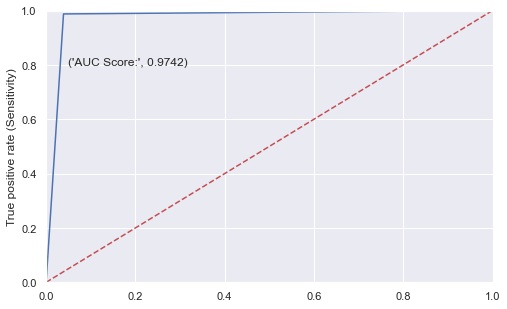

In [185]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes

plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier is away from the dotted line having AUC score 1.0; which means the meta-estimator model is a excellent classifier  


**4. Tabulate the results**

In [186]:

# compiling the required information
Bagging_Meta_estimator = pd.Series({'Model': "Bagging Meta-estimator"+ls[i],
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Bagging_Meta_estimator , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.977437,0.968944,0.987342,0.977564,0.978056
1,Decision Tree Classifier,0.974355,0.974684,0.974684,0.974359,0.974684
2,Random Forest Classifier,0.977437,0.968944,0.987342,0.977564,0.978056
3,Bagging Meta-estimator(LR),0.974190,0.962963,0.987342,0.974359,0.975000


<a id="AdaBoost"> </a>
## **5.2 AdaBoost**

Now we build a ensemble model using AdaBoost. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a  model using AdaBoost, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      

**1. Build the model**

In [187]:
from sklearn.ensemble import AdaBoostClassifier


# build the model
if i==0:
  adaboost = AdaBoostClassifier(LogisticRegression(random_state=10))
elif i==1:
  adaboost = AdaBoostClassifier(DecisionTreeClassifier(random_state=10))
elif i==2:
  adaboost = AdaBoostClassifier(RandomForestClassifier(random_state=10))

# fit the model
adaboost.fit(X_train, y_train)




AdaBoostClassifier(base_estimator=LogisticRegression(random_state=10))

**2. Do predictions on the test set**

In [188]:
# predict the values
y_pred_adaboost  = adaboost.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

**3. Compute accuracy measures**

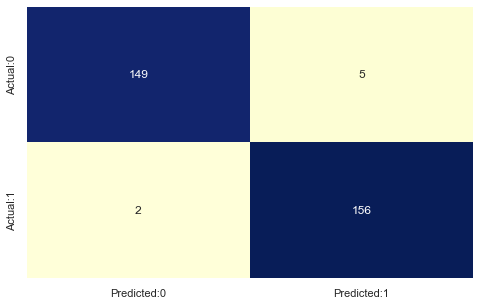

In [189]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_adaboost)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],
                           index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [190]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_adaboost)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       154
           1       0.97      0.99      0.98       158

    accuracy                           0.98       312
   macro avg       0.98      0.98      0.98       312
weighted avg       0.98      0.98      0.98       312



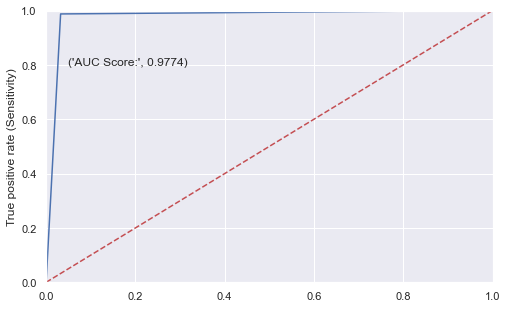

In [191]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_adaboost)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_adaboost),4)))

# name the plot, and both axes

plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier (Adaboost) is far away from the dotted line with AUC score 1.0; which means that Adaboost is a excellent classifier  

**4. Tabulate the results**

In [192]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
adaboost_metrics = pd.Series({'Model': "AdaBoost"+ls[i],
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_adaboost),
                 'Precision Score': metrics.precision_score(y_test, y_pred_adaboost),
                 'Recall Score': metrics.recall_score(y_test, y_pred_adaboost),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_adaboost),
                  'f1-score':metrics.f1_score(y_test, y_pred_adaboost)})



# appending our result table
result_tabulation = result_tabulation.append(adaboost_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.977437,0.968944,0.987342,0.977564,0.978056
1,Decision Tree Classifier,0.974355,0.974684,0.974684,0.974359,0.974684
2,Random Forest Classifier,0.977437,0.968944,0.987342,0.977564,0.978056
3,Bagging Meta-estimator(LR),0.974190,0.962963,0.987342,0.974359,0.975000
4,AdaBoost(LR),0.977437,0.968944,0.987342,0.977564,0.978056


It can be seen from the result tabulation, that all of the accuracy measures for both the models are very good.

<a id="XGBM"> </a>
## **5.3 XGBM**

Now we build a Ensemble learning model using XGB(extreme Gradient Boosting). We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to build a model using XGBM, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results 

**1. Build the model**

In [193]:
!pip install xgboost

In [194]:
#import xgboost classifier
from xgboost.sklearn import XGBClassifier

# build the model
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
# fit the model
xgbm.fit(X_train, y_train)




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

**2. Predict the values for the test set**

In [195]:
# predict the values
y_pred_xgbm  = xgbm.predict(X_test)

**3. Compute accuracy measures**

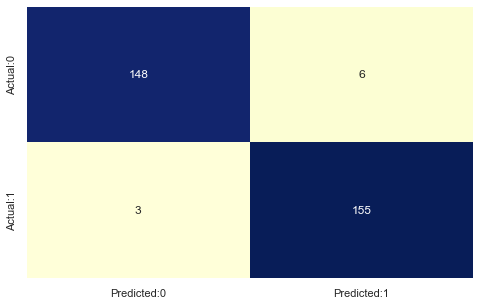

In [196]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgbm)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [197]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_xgbm)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       154
           1       0.96      0.98      0.97       158

    accuracy                           0.97       312
   macro avg       0.97      0.97      0.97       312
weighted avg       0.97      0.97      0.97       312



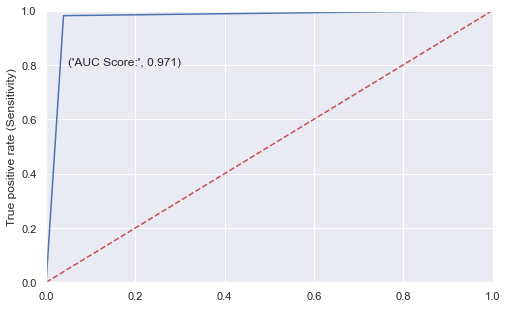

In [198]:

# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbm)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_xgbm),4)))

# name the plot, and both axes

plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier is very far away from the dotted line; which means the it is a good classifier 

**5. Tabulate the results**

In [199]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
xgbm_metrices = pd.Series({'Model': "XGBM"+ls[i],
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_xgbm),
                 'Precision Score': metrics.precision_score(y_test, y_pred_xgbm),
                 'Recall Score': metrics.recall_score(y_test, y_pred_xgbm),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_xgbm),

                  'f1-score':metrics.f1_score(y_test, y_pred_xgbm)})



# appending our result table
result_tabulation = result_tabulation.append(xgbm_metrices , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.977437,0.968944,0.987342,0.977564,0.978056
1,Decision Tree Classifier,0.974355,0.974684,0.974684,0.974359,0.974684
2,Random Forest Classifier,0.977437,0.968944,0.987342,0.977564,0.978056
3,Bagging Meta-estimator(LR),0.974190,0.962963,0.987342,0.974359,0.975000
4,AdaBoost(LR),0.977437,0.968944,0.987342,0.977564,0.978056
5,XGBM(LR),0.971026,0.962733,0.981013,0.971154,0.971787


<a id="model_cmp"> </a>
## **6. Model Comparision**

In [200]:
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.977437,0.968944,0.987342,0.977564,0.978056
1,Decision Tree Classifier,0.974355,0.974684,0.974684,0.974359,0.974684
2,Random Forest Classifier,0.977437,0.968944,0.987342,0.977564,0.978056
3,Bagging Meta-estimator(LR),0.974190,0.962963,0.987342,0.974359,0.975000
4,AdaBoost(LR),0.977437,0.968944,0.987342,0.977564,0.978056
5,XGBM(LR),0.971026,0.962733,0.981013,0.971154,0.971787


<a id="power_bi"> </a>
## **7. Power BI Report**

In [201]:
!pip install powerbiclient

In [202]:
from powerbiclient import Report,models

In [203]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication

auth_id=DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code HEPD7XXG8 to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [204]:
g_id="d0dd9329-b5cc-4973-b8c8-4e009c94e81f"
r_id="b50190a8-f80f-4f0d-9def-fe5fc44d2cdd"

In [205]:
report=Report(group_id = g_id, report_id = r_id, auth = auth_id)
report

Report()